In [1]:
import requests


from FPL import FPL

import warnings
warnings.filterwarnings("ignore")

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
response = requests.get(url)
json = response.json()

# Aggregate

In [2]:
# Avg value per position
FPL(json).createPivot('element_type', 'value_season').head()

,element_type,value_season
2,Goalkeeper,15.064000
0,Defender,12.521101
3,Midfielder,10.474667
1,Forward,9.219048


In [3]:
# Avg value per team
FPL(json).createPivot('team', 'value_season').head()

,team,value_season
11,Man City,15.142857
10,Liverpool,13.711765
18,West Ham,13.693333
0,Arsenal,13.162500
2,Brentford,12.900000


In [4]:
# Avg form per team
FPL(json).createPivot('team', 'form').head()

,team,form
10,Liverpool,4.535294
11,Man City,4.000000
16,Spurs,3.643750
5,Chelsea,3.589474
6,Crystal Palace,3.580000


# Top players overall

In [13]:
# Sorting by value season
df = FPL(json).getPlayerDf()
df.sort_values('value_season', ascending=False).head(10)


,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
679,Coady,Wolves,Defender,49,2686.0,25.1,123,4.2,0.9
700,Malheiro de Sá,Wolves,Goalkeeper,53,2700.0,24.7,131,3.2,0.6
406,Cancelo,Man City,Defender,69,2417.0,23.5,162,6.7,1.0
364,Matip,Liverpool,Defender,49,2070.0,23.1,113,7.8,1.6
371,Ramses Becker,Liverpool,Goalkeeper,60,2430.0,23.0,138,7.5,1.2
25,White,Arsenal,Defender,45,2340.0,22.9,103,3.6,0.8
32,Ramsdale,Arsenal,Goalkeeper,51,2160.0,22.9,117,2.8,0.5
56,Cash,Aston Villa,Defender,53,2567.0,22.6,120,9.2,1.7
658,Bowen,West Ham,Midfielder,68,2361.0,22.5,153,1.0,0.1
432,de Gea,Man Utd,Goalkeeper,51,2610.0,22.2,113,3.0,0.6


In [6]:
# Sorting by form
df = FPL(json).getPlayerDf()
df.sort_values('form', ascending=False).head(10)


,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
208,Havertz,Chelsea,Midfielder,79,1300.0,10.8,85,11.0,1.4
56,Cash,Aston Villa,Defender,53,2567.0,22.6,120,9.2,1.7
374,Robertson,Liverpool,Defender,72,1934.0,19.7,142,9.2,1.3
566,Kane,Spurs,Forward,125,2421.0,10.9,136,8.8,0.7
212,Chalobah,Chelsea,Defender,47,1177.0,17.7,83,8.7,1.9
370,Mané,Liverpool,Midfielder,117,2226.0,12.0,140,8.2,0.7
401,De Bruyne,Man City,Midfielder,117,1531.0,10.5,123,8.0,0.7
84,Toney,Brentford,Forward,67,2188.0,16.3,109,8.0,1.2
369,van Dijk,Liverpool,Defender,68,2430.0,22.1,150,8.0,1.2
364,Matip,Liverpool,Defender,49,2070.0,23.1,113,7.8,1.6


# Top per filtered

In [7]:
column = 'element_type'
element = 'Defender'

In [14]:
# Value
FPL(json).dfFiltered(column, element, 'value_season').head(10)

,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
679,Coady,Wolves,Defender,49,2686.0,25.1,123,4.2,0.9
406,Cancelo,Man City,Defender,69,2417.0,23.5,162,6.7,1.0
364,Matip,Liverpool,Defender,49,2070.0,23.1,113,7.8,1.6
25,White,Arsenal,Defender,45,2340.0,22.9,103,3.6,0.8
56,Cash,Aston Villa,Defender,53,2567.0,22.6,120,9.2,1.7
689,Kilman,Wolves,Defender,46,2508.0,22.2,102,2.0,0.4
20,Magalhães,Arsenal,Defender,53,2196.0,22.1,117,3.6,0.7
369,van Dijk,Liverpool,Defender,68,2430.0,22.1,150,8.0,1.2
377,Alexander-Arnold,Liverpool,Defender,85,2313.0,22.0,187,7.8,0.9
409,Laporte,Man City,Defender,58,2082.0,21.2,123,5.0,0.9


In [9]:
# Form
FPL(json).dfFiltered(column, element, 'form').head(10)

,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
374,Robertson,Liverpool,Defender,72,1934.0,19.7,142,9.2,1.3
56,Cash,Aston Villa,Defender,53,2567.0,22.6,120,9.2,1.7
212,Chalobah,Chelsea,Defender,47,1177.0,17.7,83,8.7,1.9
369,van Dijk,Liverpool,Defender,68,2430.0,22.1,150,8.0,1.2
377,Alexander-Arnold,Liverpool,Defender,85,2313.0,22.0,187,7.8,0.9
364,Matip,Liverpool,Defender,49,2070.0,23.1,113,7.8,1.6
569,Doherty,Spurs,Defender,48,761.0,10.8,52,6.8,1.4
406,Cancelo,Man City,Defender,69,2417.0,23.5,162,6.7,1.0
209,James,Chelsea,Defender,62,1184.0,17.6,109,6.0,1.0
402,Stones,Man City,Defender,52,861.0,11.9,62,5.7,1.1


# Distribution

array([[<AxesSubplot:title={'center':'value_form'}>]], dtype=object)

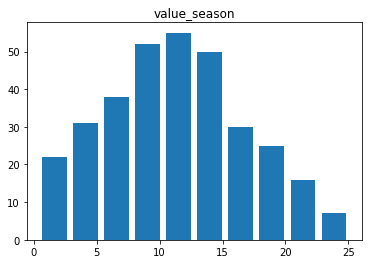

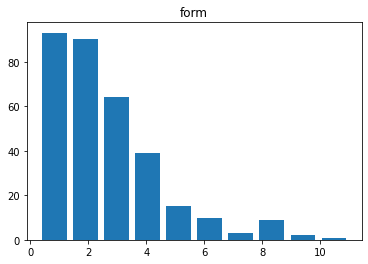

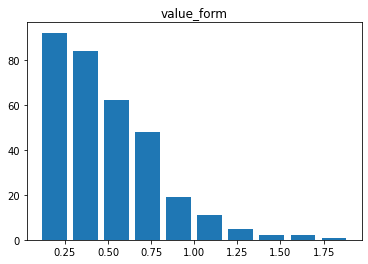

In [11]:
# Getting a feeling for distribution
df = FPL(json).getPlayerDf()

df.hist(column='value_season', bins=10, grid=False, rwidth=.8)
df.hist(column='form', bins=10, grid=False, rwidth=.8)
df.hist(column='value_form', bins=10, grid=False, rwidth=.8)